In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier, export_text
from tqdm.auto import tqdm
from joblib import dump, load
import re
import json
from sklearn.neighbors import NearestNeighbors
# from impyute.imputation.cs import em
# from sklearn.impute import IterativeImputer

# Load data
df = pd.read_csv("bgg_dataset.csv", sep = ';')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)

print("First 1 records:\n", df.head(3))

First 1 records:
          ID                       Name  Year Published  Min Players  Max Players  Play Time  Min Age  Users Rated Rating Average  BGG Rank  \
0  174430.0                 Gloomhaven          2017.0            1            4        120       14        42055           8,79         1   
1  161936.0  Pandemic Legacy: Season 1          2015.0            2            4         60       13        41643           8,61         2   
2  224517.0          Brass: Birmingham          2018.0            2            4        120       14        19217           8,66         3   

  Complexity Average  Owned Users  \
0               3,86      68323.0   
1               2,84      65294.0   
2               3,91      28785.0   

                                                                                                                                                                                                                                                                        

In [240]:
df.shape

(20343, 14)

In [241]:
df.describe(include = 'all')

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
count,20327.000000,20343,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343,20343.000000,20343,20320.000000,18745,10184
unique,NaN,19976,NaN,NaN,NaN,NaN,NaN,NaN,627,NaN,383,NaN,7381,39
top,NaN,Robin Hood,NaN,NaN,NaN,NaN,NaN,NaN,"6,50",NaN,1,NaN,Hand Management,Wargames
freq,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,110,NaN,2303,NaN,432,3029
mean,108216.245142,NaN,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,NaN,10172.890429,NaN,1408.457628,NaN,NaN
std,98682.097298,NaN,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,NaN,5872.831597,NaN,5040.179315,NaN,NaN
min,1.000000,NaN,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,NaN,1.000000,NaN,0.000000,NaN,NaN
25%,11029.000000,NaN,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,NaN,5087.500000,NaN,146.000000,NaN,NaN
50%,88931.000000,NaN,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,NaN,10173.000000,NaN,309.000000,NaN,NaN
75%,192939.500000,NaN,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,NaN,15258.500000,NaN,864.000000,NaN,NaN


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB


In [243]:
df.isna().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [244]:
df.drop('ID', axis = 1, inplace = True)

In [245]:
df.columns

Index(['Name', 'Year Published', 'Min Players', 'Max Players', 'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

<Axes: >

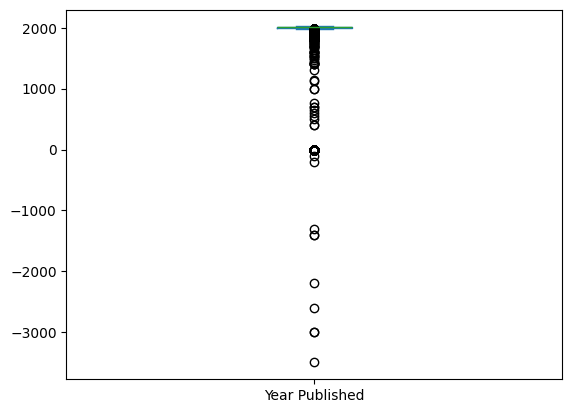

In [246]:
df['Year Published'].plot.box()

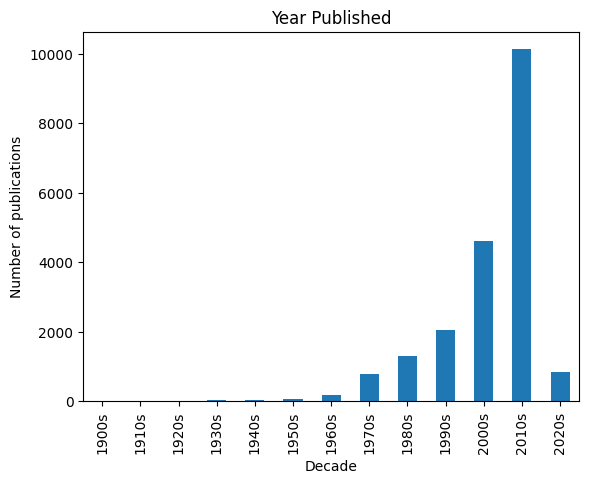

In [247]:
bins = range(1900, 2031, 10)  
labels = [f'{x}s' for x in bins[:-1]]

df['Decade'] = pd.cut(df['Year Published'], bins=bins, labels=labels, right=False)

df['Decade'].value_counts().sort_index().plot.bar()

plt.xlabel('Decade')
plt.ylabel('Number of publications')
plt.title('Year Published')
plt.show()
df.drop('Decade', axis = 1, inplace = True)

In [248]:
df.loc[df['Year Published'] < 1900, 'Year Published'] = None

In [249]:
df['Owned Users'] = df['Owned Users'].fillna(0)

In [250]:
df.isna().sum()

Name                      0
Year Published          297
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users               0
Mechanics              1598
Domains               10159
dtype: int64

<Axes: >

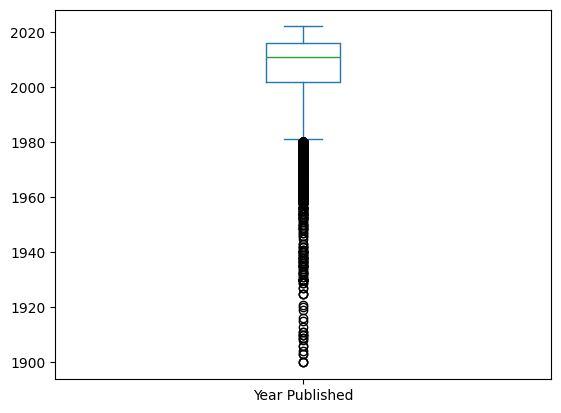

In [251]:
"""
Imputation - you can try with:
from impyute.imputation.cs import em
df = em(df)

or
imputer_mice = IterativeImputer(max_iter=10, random_state=7)
df = imputer_mice.fit_transform(df)
"""

imp_median = SimpleImputer(strategy='median')
df['Year Published'] = imp_median.fit_transform(df[['Year Published']])

df['Year Published'].plot.box()

In [252]:
df.dtypes

Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average         object
BGG Rank                int64
Complexity Average     object
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

In [253]:
df['Year Published'] = df['Year Published'].astype(int)
df['Rating Average'] = df['Rating Average'].str.replace(',', '.').astype(float)
df['Complexity Average'] = df['Complexity Average'].str.replace(',', '.').astype(float)

In [209]:
df.duplicated().sum()

0

In [210]:
mechanics_list_per_row = df['Mechanics'].fillna('x').str.split(',').apply(lambda lst: [s.strip() for s in lst])

In [211]:
domains_list_per_row = df['Domains'].fillna('x').str.split(',').apply(lambda lst: [s.strip() for s in lst])

In [212]:
mlb_mechanics = MultiLabelBinarizer()
mechanics_encoded = mlb_mechanics.fit_transform(mechanics_list_per_row)

mechanics_df = pd.DataFrame(mechanics_encoded, columns=mlb_mechanics.classes_, index=df.index)


mlb_domains = MultiLabelBinarizer()
domains_encoded = mlb_domains.fit_transform(domains_list_per_row)

domains_df = pd.DataFrame(domains_encoded, columns=mlb_domains.classes_, index=df.index)


df = pd.concat([df, mechanics_df, domains_df], axis=1)

df = df.drop(columns=['Mechanics', 'Domains', 'x'])


print("First 1 records:\n", df.head(1))

First 1 records:
          Name  Year Published  Min Players  Max Players  Play Time  Min Age  Users Rated  Rating Average  BGG Rank  Complexity Average  Owned Users  \
0  Gloomhaven            2017            1            4        120       14        42055            8.79         1                3.86      68323.0   

   Acting  Action Drafting  Action Points  Action Queue  Action Retrieval  Action Timer  Action/Event  Advantage Token  Alliances  \
0       0                0              0             1                 1             0             0                0          0   

   Area Majority / Influence  Area Movement  Area-Impulse  Auction/Bidding  Auction: Dexterity  Auction: Dutch  Auction: Dutch Priority  \
0                          0              0             0                0                   0               0                        0   

   Auction: English  Auction: Fixed Placement  Auction: Once Around  Auction: Sealed Bid  Auction: Turn Order Until Pass  Automatic R

In [213]:
df.describe(include = 'all')

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Acting,Action Drafting,Action Points,Action Queue,Action Retrieval,Action Timer,Action/Event,Advantage Token,Alliances,Area Majority / Influence,Area Movement,Area-Impulse,Auction/Bidding,Auction: Dexterity,Auction: Dutch,Auction: Dutch Priority,Auction: English,Auction: Fixed Placement,Auction: Once Around,Auction: Sealed Bid,Auction: Turn Order Until Pass,Automatic Resource Growth,Betting and Bluffing,Bias,Bingo,Bribery,Campaign / Battle Card Driven,Card Drafting,Card Play Conflict Resolution,Catch the Leader,Chaining,Chit-Pull System,Closed Economy Auction,Command Cards,Commodity Speculation,Communication Limits,Connections,Constrained Bidding,Contracts,Cooperative Game,Crayon Rail System,Critical Hits and Failures,Cube Tower,Deck Bag and Pool Building,Deck Construction,Deduction,Delayed Purchase,Dice Rolling,Die Icon Resolution,Different Dice Movement,Different Worker Types,Drafting,Elapsed Real Time Ending,Enclosure,End Game Bonuses,Events,Finale Ending,Flicking,Follow,Force Commitment,Grid Coverage,Grid Movement,Hand Management,Hexagon Grid,Hidden Movement,Hidden Roles,Hidden Victory Points,Highest-Lowest Scoring,Hot Potato,I Cut You Choose,Impulse Movement,Income,Increase Value of Unchosen Resources,Induction,Interrupts,Investment,Kill Steal,King of the Hill,Ladder Climbing,Layering,Legacy Game,Line Drawing,Line of Sight,Loans,Lose a Turn,Mancala,Map Addition,Map Deformation,Map Reduction,Market,Matching,Measurement Movement,Melding and Splaying,Memory,Minimap Resolution,Modular Board,Move Through Deck,Movement Points,Movement Template,Moving Multiple Units,Multiple Maps,Multiple-Lot Auction,Narrative Choice / Paragraph,Negotiation,Network and Route Building,Once-Per-Game Abilities,Order Counters,Ownership,Paper-and-Pencil,Passed Action Token,Pattern Building,Pattern Movement,Pattern Recognition,Physical Removal,Pick-up and Deliver,Pieces as Map,Player Elimination,Player Judge,Point to Point Movement,Predictive Bid,Prisoner's Dilemma,Programmed Movement,Push Your Luck,Race,Random Production,Ratio / Combat Results Table,Re-rolling and Locking,Real-Time,Relative Movement,Resource to Move,Rock-Paper-Scissors,Role Playing,Roles with Asymmetric Information,Roll / Spin and Move,Rondel,Scenario / Mission / Campaign Game,Score-and-Reset Game,Secret Unit Deployment,Selection Order Bid,Semi-Cooperative Game,Set Collection,Simulation,Simultaneous Action Selection,Singing,Single Loser Game,Slide/Push,Solo / Solitaire Game,Speed Matching,Square Grid,Stacking and Balancing,Stat Check Resolution,Static Capture,Stock Holding,Storytelling,Sudden Death Ending,Take That,Targeted Clues,Team-Based Game,Tech Trees / Tech Tracks,Three Dimensional Movement,Tile Placement,Time Track,Track Movement,Trading,Traitor Game,Trick-taking,Tug of War,Turn Order: Auction,Turn Order: Claim Action,Turn Order: Pass Order,Turn Order: Progressive,Turn Order: Random,Turn Order: Role Order,Turn Order: Stat-Based,Variable Phase Order,Variable Player Powers,Variable Set-up,Victory Points as a Resource,Voting,Worker Placement,Worker Placement with Dice Workers,Zone of Control,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
count,20343,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.00000

In [214]:
X = df.drop(columns=['Name'])
names = df['Name']

In [215]:
corr_matrix = X.corr().abs() 

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack())

sol = sol.sort_values(ascending=False)


correlation_threshold = 0.75

highly_correlated_pairs = sol[sol > correlation_threshold]

print(f"Feature pairs with correlation above {correlation_threshold}:")
print(highly_correlated_pairs)

Feature pairs with correlation above 0.75:
Users Rated  Owned Users    0.986025
dtype: float64


In [216]:
X = X.drop(columns=['Owned Users'])

In [217]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [193]:
n_components_range = range(2, 100, 6)
covariance_types = ['spherical', 'tied', 'diag', 'full']

results = []
# Iterate over covariance types and number of components to find the best model
for cov_type in tqdm(covariance_types, desc="Covariance Types"):
    for n_components in tqdm(n_components_range, desc=f"Number of Components for '{cov_type}'", leave=False):
        try:
            gmm = GaussianMixture(n_components=n_components,
                                  covariance_type=cov_type,
                                  n_init=3,
                                  random_state=7)
            gmm.fit(X_scaled)
            
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': gmm.aic(X_scaled),
                'bic': gmm.bic(X_scaled)
            })
        except Exception as e:
            # In case of a convergence error, record the failure and continue
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': np.nan,
                'bic': np.nan
            })

results_df = pd.DataFrame(results)

# Find the best models based on AIC and BIC scores
best_bic_model = results_df.loc[results_df['bic'].idxmin()]
best_aic_model = results_df.loc[results_df['aic'].idxmin()]

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# BIC plot
sns.lineplot(data=results_df, x='n_components', y='bic', hue='covariance_type', ax=axes[0])
axes[0].set_title('Bayesian Information Criterion (BIC)', fontsize=16)
axes[0].set_xlabel('Number of components (clusters)', fontsize=12)
axes[0].set_ylabel('BIC Value (lower is better)', fontsize=12)
axes[0].legend(title='Covariance Type')

# AIC plot
sns.lineplot(data=results_df, x='n_components', y='aic', hue='covariance_type', ax=axes[1])
axes[1].set_title('Akaike Information Criterion (AIC)', fontsize=16)
axes[1].set_xlabel('Number of components (clusters)', fontsize=12)
axes[1].set_ylabel('AIC Value (lower is better)', fontsize=12)
axes[1].legend(title='Covariance Type')

plt.suptitle('Comparison of AIC and BIC for GMM Model Selection', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Typy Kowariancji:   0%|          | 0/4 [00:00<?, ?it/s]

Liczba Komponentów dla 'spherical':   0%|          | 0/17 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
n_components_range = range(100, 201, 10)
covariance_types = ['diag']

results = []
# Iterate over the specified covariance type and number of components
for cov_type in tqdm(covariance_types, desc="Covariance Types"):
    for n_components in tqdm(n_components_range, desc=f"Number of Components for '{cov_type}'", leave=False):
        try:
            gmm = GaussianMixture(n_components=n_components,
                                  covariance_type=cov_type,
                                  n_init=3,
                                  random_state=7)
            gmm.fit(X_scaled)
            
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': gmm.aic(X_scaled),
                'bic': gmm.bic(X_scaled)
            })
        except Exception as e:
            # In case of a convergence error, record the failure and continue
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': np.nan,
                'bic': np.nan
            })

results_df = pd.DataFrame(results)

# Find the best models based on AIC and BIC scores
best_bic_model = results_df.loc[results_df['bic'].idxmin()]
best_aic_model = results_df.loc[results_df['aic'].idxmin()]

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# BIC plot
sns.lineplot(data=results_df, x='n_components', y='bic', hue='covariance_type', ax=axes[0])
axes[0].set_title('Bayesian Information Criterion (BIC)', fontsize=16)
axes[0].set_xlabel('Number of components (clusters)', fontsize=12)
axes[0].set_ylabel('BIC Value (lower is better)', fontsize=12)
axes[0].legend(title='Covariance Type')

# AIC plot
sns.lineplot(data=results_df, x='n_components', y='aic', hue='covariance_type', ax=axes[1])
axes[1].set_title('Akaike Information Criterion (AIC)', fontsize=16)
axes[1].set_xlabel('Number of components (clusters)', fontsize=12)
axes[1].set_ylabel('AIC Value (lower is better)', fontsize=12)
axes[1].legend(title='Covariance Type')

plt.suptitle('Comparison of AIC and BIC for GMM Model Selection', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
n_components_range = range(260, 350, 10)
covariance_types = ['diag']

results = []
# Iterate over the specified covariance type and number of components
for cov_type in tqdm(covariance_types, desc="Covariance Types"):
    for n_components in tqdm(n_components_range, desc=f"Number of Components for '{cov_type}'", leave=False):
        try:
            gmm = GaussianMixture(n_components=n_components,
                                  covariance_type=cov_type,
                                  n_init=3,
                                  random_state=7)
            gmm.fit(X_scaled)
            
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': gmm.aic(X_scaled),
                'bic': gmm.bic(X_scaled)
            })
        except Exception as e:
            # In case of a convergence error, record the failure and continue
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': np.nan,
                'bic': np.nan
            })

results_df = pd.DataFrame(results)

# Find the best models based on AIC and BIC scores
best_bic_model = results_df.loc[results_df['bic'].idxmin()]
best_aic_model = results_df.loc[results_df['aic'].idxmin()]

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# BIC plot
sns.lineplot(data=results_df, x='n_components', y='bic', hue='covariance_type', ax=axes[0])
axes[0].set_title('Bayesian Information Criterion (BIC)', fontsize=16)
axes[0].set_xlabel('Number of components (clusters)', fontsize=12)
axes[0].set_ylabel('BIC Value (lower is better)', fontsize=12)
axes[0].legend(title='Covariance Type')

# AIC plot
sns.lineplot(data=results_df, x='n_components', y='aic', hue='covariance_type', ax=axes[1])
axes[1].set_title('Akaike Information Criterion (AIC)', fontsize=16)
axes[1].set_xlabel('Number of components (clusters)', fontsize=12)
axes[1].set_ylabel('AIC Value (lower is better)', fontsize=12)
axes[1].legend(title='Covariance Type')

plt.suptitle('Comparison of AIC and BIC for GMM Model Selection', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
n_components_range = range(355, 450, 10)
covariance_types = ['diag']

results = []
# Iterate over the specified covariance type and number of components
for cov_type in tqdm(covariance_types, desc="Covariance Types"):
    for n_components in tqdm(n_components_range, desc=f"Number of Components for '{cov_type}'", leave=False):
        try:
            gmm = GaussianMixture(n_components=n_components,
                                  covariance_type=cov_type,
                                  n_init=3,
                                  random_state=7)
            gmm.fit(X_scaled)
            
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': gmm.aic(X_scaled),
                'bic': gmm.bic(X_scaled)
            })
        except Exception as e:
            # In case of a convergence error, record the failure and continue
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': np.nan,
                'bic': np.nan
            })

results_df = pd.DataFrame(results)

# Find the best models based on AIC and BIC scores
best_bic_model = results_df.loc[results_df['bic'].idxmin()]
best_aic_model = results_df.loc[results_df['aic'].idxmin()]

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# BIC plot
sns.lineplot(data=results_df, x='n_components', y='bic', hue='covariance_type', ax=axes[0])
axes[0].set_title('Bayesian Information Criterion (BIC)', fontsize=16)
axes[0].set_xlabel('Number of components (clusters)', fontsize=12)
axes[0].set_ylabel('BIC Value (lower is better)', fontsize=12)
axes[0].legend(title='Covariance Type')

# AIC plot
sns.lineplot(data=results_df, x='n_components', y='aic', hue='covariance_type', ax=axes[1])
axes[1].set_title('Akaike Information Criterion (AIC)', fontsize=16)
axes[1].set_xlabel('Number of components (clusters)', fontsize=12)
axes[1].set_ylabel('AIC Value (lower is better)', fontsize=12)
axes[1].legend(title='Covariance Type')

plt.suptitle('Comparison of AIC and BIC for GMM Model Selection', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Objective Elbow Analysis ---
The point on the curve furthest from the trend line (the objective 'elbow'):
n_components          38.0
bic            -32000000.0
Name: 6, dtype: float64


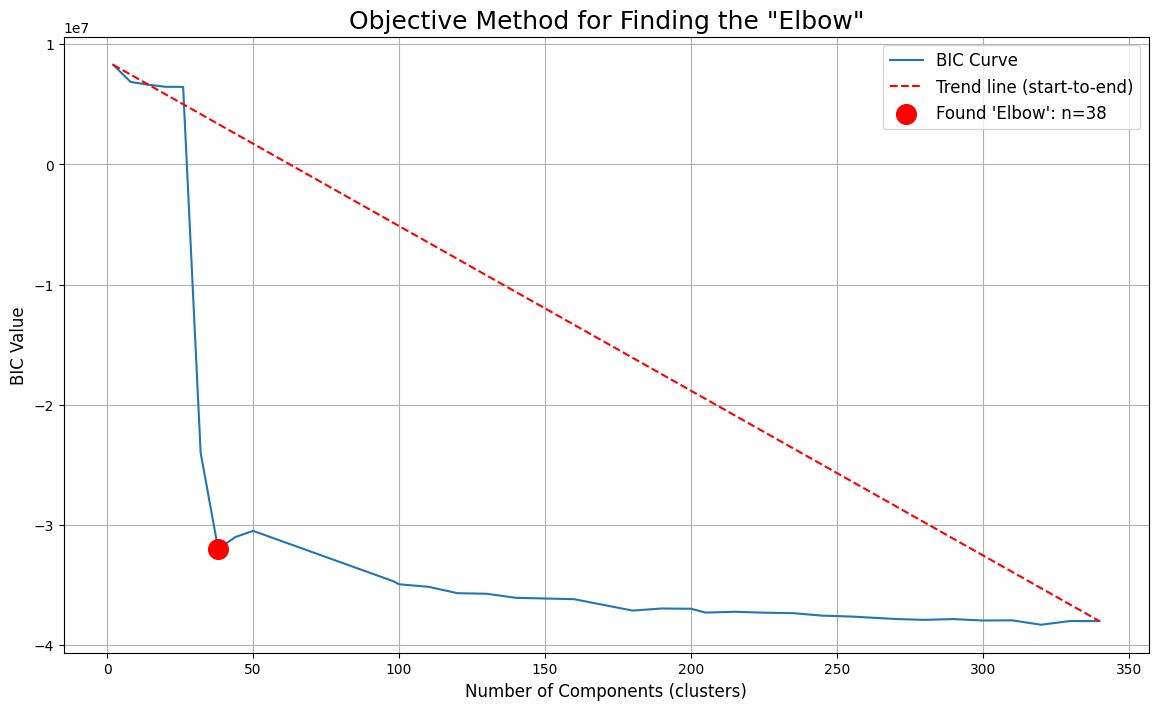

In [258]:
data = {
    'n_components': [2, 8, 14, 20, 26, 32, 38, 44, 50, 98, 100, 110, 120, 130, 140, 160, 180, 190, 200, 205, 215, 225, 235, 245, 255, 260, 270, 280, 290, 300, 310, 320, 330, 340],
    'bic': [
        8.295370e+06, 6.864414e+06, 6.632025e+06, 6.456427e+06, 6.450649e+06, -2.4e7, -3.2e7, # Estimates based on graphs
        -3.1e7, -3.05e7, -3.468605e+07, -3.494222e+07, -3.515248e+07, -3.568234e+07, 
        -3.573502e+07, -3.606833e+07, -3.618395e+07, -3.713113e+07, -3.695880e+07, -3.698064e+07, 
        -3.729972e+07, -3.723190e+07, -3.730624e+07, -3.734635e+07, -3.755273e+07,
        -3.763051e+07, -3.769631e+07, -3.783097e+07, -3.790475e+07, -3.784024e+07,
        -3.795986e+07, -3.794356e+07, -3.830900e+07, -3.800e7, -3.801e7
    ]
}
all_results_df = pd.DataFrame(data).sort_values(by='n_components').reset_index(drop=True)

# Normalize the data to a [0, 1] scale. This is crucial for giving the x and y axes
# equal weight in the distance calculations.
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(all_results_df[['n_components', 'bic']])

# Define the start and end points of the normalized line
p_start = data_normalized[0]
p_end = data_normalized[-1]

# Calculate the perpendicular distance of each point from the line connecting start and end.
line_vec = p_end - p_start
point_vecs = data_normalized - p_start
distances = np.abs(np.cross(line_vec, point_vecs)) / np.linalg.norm(line_vec)

# Find the index of the point with the maximum distance, which is the "elbow"
elbow_index = np.argmax(distances)
elbow_point = all_results_df.iloc[elbow_index]

print("--- Objective Elbow Analysis ---")
print(f"The point on the curve furthest from the trend line (the objective 'elbow'):\n{elbow_point}")

# Visualize the results to provide proof for the choice
plt.figure(figsize=(14, 8))
sns.lineplot(data=all_results_df, x='n_components', y='bic', label='BIC Curve')
plt.plot([all_results_df['n_components'].iloc[0], all_results_df['n_components'].iloc[-1]],
         [all_results_df['bic'].iloc[0], all_results_df['bic'].iloc[-1]],
         'r--', label='Trend line (start-to-end)')

# Highlight the found "elbow" on the plot
plt.scatter(elbow_point['n_components'], elbow_point['bic'], color='red', s=200, zorder=5, 
            label=f"Found 'Elbow': n={int(elbow_point['n_components'])}")

plt.title('Objective Method for Finding the "Elbow"', fontsize=18)
plt.xlabel('Number of Components (clusters)', fontsize=12)
plt.ylabel('BIC Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
n_components_range = range(32, 45)
covariance_types = ['diag']

results = []
# Iterate over the specified covariance type and number of components
for cov_type in tqdm(covariance_types, desc="Covariance Types"):
    for n_components in tqdm(n_components_range, desc=f"Number of Components for '{cov_type}'", leave=False):
        try:
            gmm = GaussianMixture(n_components=n_components,
                                  covariance_type=cov_type,
                                  n_init=3,
                                  random_state=7)
            gmm.fit(X_scaled)
            
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': gmm.aic(X_scaled),
                'bic': gmm.bic(X_scaled)
            })
        except Exception as e:
            # In case of a convergence error, record the failure and continue
            results.append({
                'n_components': n_components,
                'covariance_type': cov_type,
                'aic': np.nan,
                'bic': np.nan
            })

results_df = pd.DataFrame(results)

# Find the best models based on AIC and BIC scores
best_bic_model = results_df.loc[results_df['bic'].idxmin()]
best_aic_model = results_df.loc[results_df['aic'].idxmin()]

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# BIC plot
sns.lineplot(data=results_df, x='n_components', y='bic', hue='covariance_type', ax=axes[0])
axes[0].set_title('Bayesian Information Criterion (BIC)', fontsize=16)
axes[0].set_xlabel('Number of components (clusters)', fontsize=12)
axes[0].set_ylabel('BIC Value (lower is better)', fontsize=12)
axes[0].legend(title='Covariance Type')

# AIC plot
sns.lineplot(data=results_df, x='n_components', y='aic', hue='covariance_type', ax=axes[1])
axes[1].set_title('Akaike Information Criterion (AIC)', fontsize=16)
axes[1].set_xlabel('Number of components (clusters)', fontsize=12)
axes[1].set_ylabel('AIC Value (lower is better)', fontsize=12)
axes[1].legend(title='Covariance Type')

plt.suptitle('Comparison of AIC and BIC for GMM Model Selection', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
gmm_model = GaussianMixture(n_components=38, covariance_type='diag', n_init=15).fit(X_scaled)
dump(gmm_model, 'gmm_model.joblib') 

In [36]:
final_gmm = load('gmm_model.joblib') 
cluster_labels = final_gmm.predict(X_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianMixture from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array([35, 27, 32,  0,  8, 35, 25, 32,  8, 34], dtype=int64)

In [54]:
y_binary = [1 if i == 1 else 0 for i in cluster_labels]

In [219]:
def _identify_binary_features(dataframe: pd.DataFrame) -> Set[str]:
    binary_features = set()
    for col in dataframe.columns:
        unique_values = set(dataframe[col].unique())
        if unique_values.issubset({0, 1}):
            binary_features.add(col)
    return binary_features

def _parse_condition_line(line: str) -> Optional[Tuple[str, str, float]]:
    match = re.search(r"\|---\s*(.*?)\s*(<=|>)\s*([\d.-]+)", line)
    if not match:
        return None
    feature, operator, threshold_str = match.groups()
    return feature, operator, float(threshold_str)

def _format_condition_text_english(feature: str, operator: str, threshold: float, binary_features: Set[str]) -> str:

    if feature in binary_features:
        return f"the presence of the '{feature}' feature" if operator == '>' else f"the absence of the '{feature}' feature"
    else:
        op_text = "greater than" if operator == ">" else "less than or equal to"

        return f"a '{feature}' score {op_text} {threshold:.2f}"

def _parse_class_line(line: str) -> Optional[int]:
    if 'class:' in line:
        return int(float(line.split('class: ')[1]))
    return None



def describe_game_group(tree_model, X_train: pd.DataFrame, target_class_id: int = 1) -> str:
    binary_features = _identify_binary_features(X_train)
    raw_rules = export_text(tree_model, feature_names=list(X_train.columns))
    
    characteristic_sets = []
    path_stack = {}

    for line in raw_rules.splitlines():
        depth = line.count('|   ')
        
        class_id = _parse_class_line(line)
        if class_id is not None:
            if class_id == target_class_id:
                conditions = [path_stack[d] for d in sorted(path_stack.keys()) if d < depth]
                if conditions:
                    characteristic_sets.append(" and ".join(conditions))
            continue

        condition_parts = _parse_condition_line(line)
        if condition_parts:
            feature, operator, threshold = condition_parts
            condition_text = _format_condition_text_english(feature, operator, threshold, binary_features)
            path_stack[depth] = condition_text

    if not characteristic_sets:
        return f"No specific characteristics could be determined for the group corresponding to class {target_class_id}."
        
    prefix = "The game you have chosen belongs to the group of board games characterized by "
    

    if len(characteristic_sets) == 1:
        description_body = characteristic_sets[0]
    else:
        description_body = " or ".join([f"({c})" for c in characteristic_sets])
        
    return prefix + description_body + "."


In [224]:
tree = DecisionTreeClassifier(max_depth=3, random_state=7)
tree.fit(X, y_binary)
game_group_description = describe_game_group(tree, X, target_class_id=1)

rules = export_text(
    tree,
    feature_names=X.columns,
)

#print(rules)

#print(game_group_description)

|--- Re-rolling and Locking <= 0.50
|   |--- End Game Bonuses <= 0.50
|   |   |--- Highest-Lowest Scoring <= 0.50
|   |   |   |--- class: 0
|   |   |--- Highest-Lowest Scoring >  0.50
|   |   |   |--- class: 0
|   |--- End Game Bonuses >  0.50
|   |   |--- Drafting <= 0.50
|   |   |   |--- class: 0
|   |   |--- Drafting >  0.50
|   |   |   |--- class: 1
|--- Re-rolling and Locking >  0.50
|   |--- Rating Average <= 6.66
|   |   |--- Solo / Solitaire Game <= 0.50
|   |   |   |--- class: 0
|   |   |--- Solo / Solitaire Game >  0.50
|   |   |   |--- class: 1
|   |--- Rating Average >  6.66
|   |   |--- BGG Rank <= 5545.00
|   |   |   |--- class: 1
|   |   |--- BGG Rank >  5545.00
|   |   |   |--- class: 0

The game you have chosen belongs to the group of board games characterized by (the absence of the 'Re-rolling and Locking' feature and the presence of the 'End Game Bonuses' feature and the presence of the 'Drafting' feature) or (the presence of the 'Re-rolling and Locking' feature and 

In [232]:
def precompute_all_descriptions():
    game_to_cluster_map = {name: int(label) for name, label in zip(names, cluster_labels)}

    all_descriptions = {}
    num_clusters = len(set(cluster_labels))
    
    for i in range(num_clusters):
        y_binary = [1 if label == i else 0 for label in cluster_labels]
        
        tree = DecisionTreeClassifier(max_depth=3, random_state=7)
        tree.fit(X, y_binary)
        
        description = describe_game_group(tree, X)
        all_descriptions[i] = description

    with open('cluster_descriptions.json', 'w') as f:
        json.dump(all_descriptions, f, indent=4)
        
    with open('game_to_cluster_map.json', 'w') as f:
        json.dump(game_to_cluster_map, f, indent=4)

In [270]:
def generate_top_games_per_cluster_by_rank(n_values: list):
    df['cluster'] = cluster_labels     
    for n in n_values:
        grouped_by_cluster = df.groupby('cluster')
        
        output_dict = {
            f'cluster_{cluster_id}': group.nsmallest(n, 'BGG Rank')
                                          [['Name', 'BGG Rank', 'Rating Average']]
                                          .to_dict('records')
            for cluster_id, group in grouped_by_cluster
        }

        filename = f'top_{n}_games_by_rank_per_cluster.json'
        with open(filename, 'w') as f:
            json.dump(output_dict, f, indent=4)

In [264]:
def train_nn_model():
    nn_model = NearestNeighbors(n_neighbors=6, algorithm='auto', metric='euclidean')
    nn_model.fit(X_scaled)

    dump(nn_model, 'nearest_neighbors_model.joblib')

    game_names_in_order = df['Name'].tolist()
    dump(game_names_in_order, 'game_names_list.joblib')

In [267]:
pd.DataFrame(X_scaled, columns=X.columns).to_csv('X_scaled_data.csv', index=False)